$$\textbf{Reconocimiento estadístico de Patrones. Proyecto 1: Análisis exploratorio}$$
$$\textit{Ramón Ruiz , Sarahi García}$$

In [10]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Path
carpeta = '/Users/ely/Documents/Maestria/segundo_semestre/cimat2023-1/patrones/Proyecto_1/datos/'
archivos = os.listdir(carpeta)
#lista para almacenar los nombres
productos = []
for archivo in archivos:
    if archivo.endswith('.CSV'):
        nombre_producto = os.path.splitext(archivo)[0] 
        productos.append(nombre_producto)

In [6]:
#cargamos un producto para crear un diccionario clave-ciudad
alquiler = pd.read_csv(carpeta+"alquiler.CSV")
clave=alquiler['Clave ciudad'].unique()
nombre=alquiler['Nombre ciudad'].unique()
diccionario_ciudades=dict(zip(clave, nombre))

In [8]:
#importamos la base con la que vamos a trabajar
df = pd.read_csv(carpeta+"base_productos.CSV")
df.head()

,Anio,Mes,Clave ciudad,limon,leche,camaron,tortillas,electricidad,alquiler,internet,frijol,pollo
0,2018,8,1,33.68,19.00,175.00,14.00,417.35,100.24,5.0,30.00,80.75
1,2018,8,2,14.23,16.58,178.00,16.00,192.79,100.03,25.0,22.78,90.00
2,2018,8,3,13.75,16.00,135.00,11.50,417.35,100.08,399.0,28.67,81.00
3,2018,8,4,20.40,11.17,322.00,10.05,417.35,100.24,8.0,30.29,35.00
4,2018,8,5,20.68,15.47,225.48,16.00,192.79,100.16,299.0,38.78,59.24


Nota:Todos los productos son variables continuas y cuantitativas

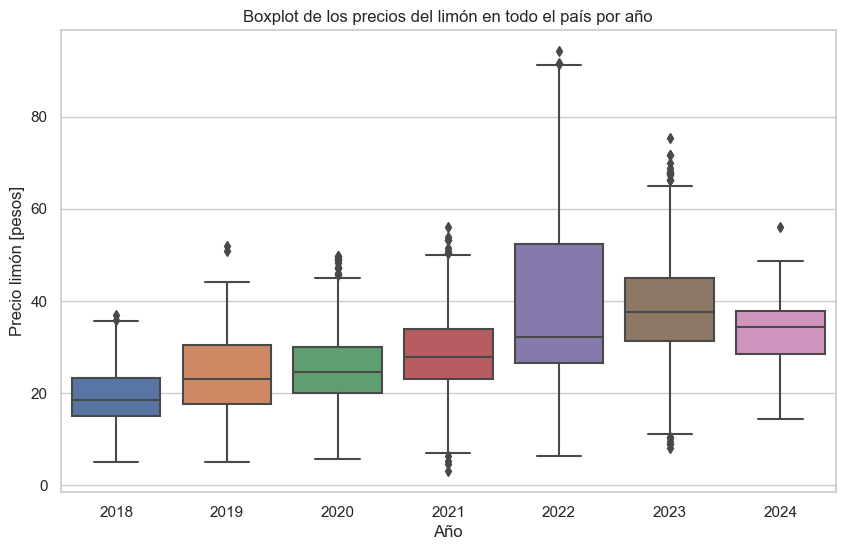

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Anio', y='limon', data=df)
plt.title('Boxplot de los precios del limón en todo el país por año')
plt.xlabel('Año')
plt.ylabel('Precio limón [pesos]')
plt.show()

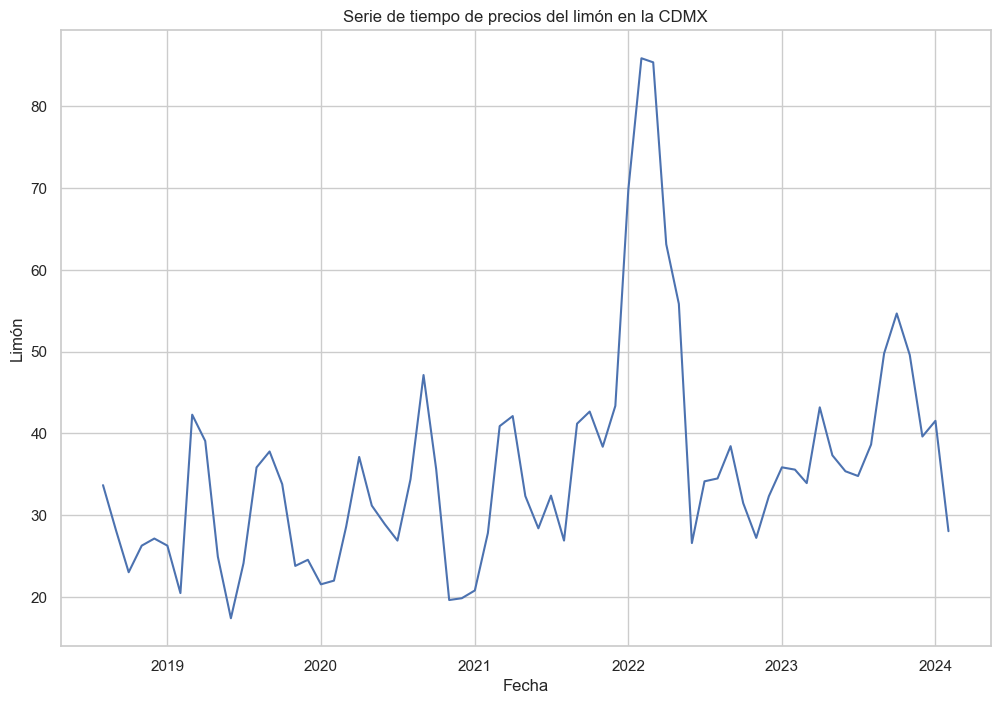

In [22]:
df['Fecha'] = pd.to_datetime(df['Anio'].astype(str) + '-' + df['Mes'].astype(str) + '-01')

ciudad_1_df = df[df['Clave ciudad'] == 1]

plt.figure(figsize=(12, 8))
plt.plot(ciudad_1_df['Fecha'], ciudad_1_df['limon'])

plt.title('Serie de tiempo de precios del limón en la CDMX')
plt.xlabel('Fecha')
plt.ylabel('Limón')
plt.show()

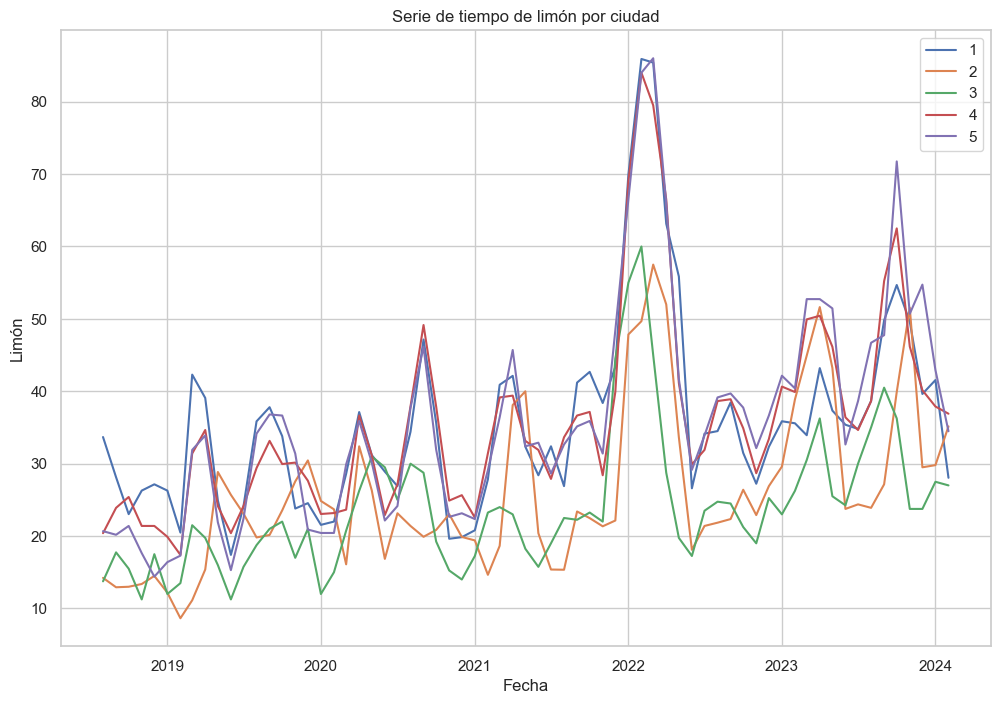

In [24]:
ciudades = [1,2,3,4,5]

# Crea una serie de tiempo para cada ciudad
plt.figure(figsize=(12, 8))
for ciudad in ciudades:
    ciudad_df = df[df['Clave ciudad'] == ciudad]
    plt.plot(ciudad_df['Fecha'], ciudad_df['limon'], label=ciudad)

plt.title('Serie de tiempo de limón por ciudad')
plt.xlabel('Fecha')
plt.ylabel('Limón')
plt.legend()
plt.show()